# Progetto Laboratorio di Big Data, Data Mining e Data Analytics

### Matteo Aloè 

DataSet preso da Kraggle : https://www.kaggle.com/datasets/HRAnalyticRepository/employee-attrition-data/data

(Il DataSet dopo vari controlli risulta simulato, perciò si potrebbero avere incoerenze nel set di dati)

Sviluppare un modello predittivo accurato che possa aiutare l'azienda a identificare i dipendenti a rischio di terminazione


### Analisi dello Stato dei Dipendenti

In questo notebook, analizzeremo i dati relativi allo stato dei dipendenti, 
utilizzando Python per svolgere operazioni di manipolazione, esplorazione e visualizzazione dei dati.
Le sezioni includeranno:



1. Caricamento dei dati
2. Pulizia e preprocessamento
3. Analisi esplorativa dei dati 
4. Bilanciamento delle classi
5. Creazione del modello 
6. Visualizzazione dei risultati e conclusioni del modello

Ogni cella è corredata da commenti per descrivere le operazioni eseguite.

Import Libraries

In [687]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [688]:
#Importo il file CSV
df = pd.read_csv('EmployeeAttrition.csv')

In [689]:
#Visualizzo le prime 5 Righe del DataFrame
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


### Conto Colonne e Righe


In [690]:
df.shape

(49653, 18)

### Check che non ci siano campi null

In [691]:
df.isnull().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

In [692]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           49653 non-null  int64 
 1   recorddate_key       49653 non-null  object
 2   birthdate_key        49653 non-null  object
 3   orighiredate_key     49653 non-null  object
 4   terminationdate_key  49653 non-null  object
 5   age                  49653 non-null  int64 
 6   length_of_service    49653 non-null  int64 
 7   city_name            49653 non-null  object
 8   department_name      49653 non-null  object
 9   job_title            49653 non-null  object
 10  store_name           49653 non-null  int64 
 11  gender_short         49653 non-null  object
 12  gender_full          49653 non-null  object
 13  termreason_desc      49653 non-null  object
 14  termtype_desc        49653 non-null  object
 15  STATUS_YEAR          49653 non-null  int64 
 16  STAT

## Pulizia e Preprocessamento
Verifico Duplicati


In [693]:
df.drop_duplicates(inplace=True)
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


Elimino Colonne non necessarie per l'analisi

In [694]:
df.drop(['EmployeeID', 'birthdate_key', 'gender_full', 'recorddate_key','orighiredate_key','terminationdate_key'], axis=1, inplace=True)

In [695]:
df.head()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,52,17,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,53,18,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,54,19,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,55,20,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,56,21,Vancouver,Executive,CEO,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


Verifico le singole [città/dipartimenti/ragione del licenziamento/Unità aziendale/Lavori] 

In [696]:
df.city_name.unique()

array(['Vancouver', 'Terrace', 'Nanaimo', 'Nelson', 'Kelowna', 'Victoria',
       'Kamloops', 'Fort St John', 'Surrey', 'Vernon', 'Quesnel',
       'Chilliwack', 'Dawson Creek', 'Squamish', 'New Westminster',
       'Port Coquitlam', 'Cortes Island', 'Burnaby', 'Bella Bella',
       'Cranbrook', 'Williams Lake', 'Trail', 'Prince George', 'Richmond',
       'Grand Forks', 'West Vancouver', 'Abbotsford', 'Aldergrove',
       'Langley', 'North Vancouver', 'White Rock', 'New Westminister',
       'Fort Nelson', 'Haney', 'Valemount', 'Ocean Falls', 'Princeton',
       'Dease Lake', 'Pitt Meadows', 'Blue River'], dtype=object)

In [697]:
df.department_name.unique()

array(['Executive', 'Store Management', 'Meats', 'Recruitment',
       'Training', 'Labor Relations', 'HR Technology', 'Employee Records',
       'Compensation', 'Legal', 'Produce', 'Accounts Receiveable',
       'Bakery', 'Information Technology', 'Accounts Payable', 'Audit',
       'Accounting', 'Investment', 'Dairy', 'Processed Foods',
       'Customer Service'], dtype=object)

In [698]:
df.termreason_desc.unique()

array(['Not Applicable', 'Retirement', 'Resignaton', 'Layoff'],
      dtype=object)

In [699]:
df.BUSINESS_UNIT.unique()

array(['HEADOFFICE', 'STORES'], dtype=object)

In [700]:
df.job_title.unique()

array(['CEO', 'VP Stores', 'Legal Counsel', 'VP Human Resources',
       'VP Finance', 'Exec Assistant, VP Stores',
       'Exec Assistant, Legal Counsel', 'CHief Information Officer',
       'Store Manager', 'Meats Manager',
       'Exec Assistant, Human Resources', 'Exec Assistant, Finance',
       'Director, Recruitment', 'Director, Training',
       'Director, Labor Relations', 'Director, HR Technology',
       'Director, Employee Records', 'Director, Compensation',
       'Corporate Lawyer', 'Produce Manager',
       'Director, Accounts Receivable', 'Bakery Manager',
       'Systems Analyst', 'Director, Accounts Payable', 'Director, Audit',
       'Director, Accounting', 'Director, Investments', 'Dairy Person',
       'Recruiter', 'Processed Foods Manager', 'Customer Service Manager',
       'Trainer', 'Meat Cutter', 'Labor Relations Analyst',
       'Dairy Manager', 'HRIS Analyst', 'Benefits Admin',
       'Compensation Analyst', 'Accounts Receiveable Clerk',
       'Accounts Pay

### Converto i lavori in 4 MacroCategorie (Amministratori, Esecutivi, Manager e Dipendenti)

In [701]:
board = ['CEO','VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance', 'Director, Accounts Receivable', 
         'Director, Accounting', 'Director, Employee Records', 'Director, Accounts Payable', 'Director, HR Technology', 
         'Director, Investments', 'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

executive = [ 'Exec Assistant, VP Stores', 'Exec Assistant, Legal Counsel', 'CHief Information Officer', 
             'Exec Assistant, Human Resources', 'Exec Assistant, Finance']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

def job_title(job):
    if job in board: return 'board'
    if job in executive: return 'executive'
    if job in manager: return 'manager'
    if job in employee: return 'employee'

df['job_title'] = df['job_title'].map(job_title)

In [702]:
df.job_title.unique()

array(['board', 'employee', 'executive', 'manager'], dtype=object)

### Converto il nome della città in base alla popolazione per poi raggrupparlo in 3 gruppi (Mega/Rural/Town)


In [703]:
city_population = {
    'Vancouver':2313328,
     'Victoria':289625,
     'Nanaimo':84905,
     'New Westminster':58549,
     'Kelowna':125109,
     'Burnaby':202799,
     'Kamloops':68714,
     'Prince George':65558,
     'Cranbrook':18610,
     'Surrey':394976,
     'Richmond':182000,
     'Terrace':19443,
     'Chilliwack':77000,
     'Trail':9707,
     'Langley':23606,
     'Vernon':47274,
     'Squamish':19512,
     'Quesnel':13799,
     'Abbotsford':151683,
     'North Vancouver':48000,
     'Fort St John':17402,
     'Williams Lake':14168,
     'West Vancouver':42694,
     'Port Coquitlam':114565,
     'Aldergrove':12363,
     'Fort Nelson':3561,
     'Nelson':9813,
     'New Westminister':58549,
     'Grand Forks':4049,
     'White Rock':66450,
     'Haney':82256,
     'Princeton':2828,
     'Dawson Creek':10802,
     'Bella Bella':1019,
     'Ocean Falls':129,
     'Pitt Meadows':174410,
     'Cortes Island':1042,
     'Valemount':1021,
     'Dease Lake':335,
     'Blue River':157
}

def change_city_into_city_pop(city):
    return city_population(city)

df['city_name'] = df['city_name'].map(city_population)

In [704]:
def change_city(population):
    str = 'rural'
    if (population >= 10000) & (population < 100000): str = 'town'
    if population >= 100000: str = 'mega'
    return str

df['city_name'] = df.city_name.map(change_city)

verifico le tipologie di città

In [705]:
df['city_name'].unique()

array(['mega', 'town', 'rural'], dtype=object)

### Revisiono il mio DataSet dopo che ho mappato i valori

In [706]:
df.head()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,52,17,mega,Executive,board,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,53,18,mega,Executive,board,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,54,19,mega,Executive,board,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,55,20,mega,Executive,board,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,56,21,mega,Executive,board,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [707]:
df.tail()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,21,2,rural,Dairy,employee,34,M,Layoff,Involuntary,2015,TERMINATED,STORES
49649,19,0,mega,Customer Service,employee,44,F,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,21,2,town,Customer Service,employee,39,F,Layoff,Involuntary,2015,TERMINATED,STORES
49651,19,0,mega,Customer Service,employee,16,F,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,20,1,rural,Customer Service,employee,13,F,Layoff,Involuntary,2014,TERMINATED,STORES


## Analisi Esplorativa dei dati


In [708]:
df.STATUS.value_counts()

STATUS
ACTIVE        48168
TERMINATED     1485
Name: count, dtype: int64

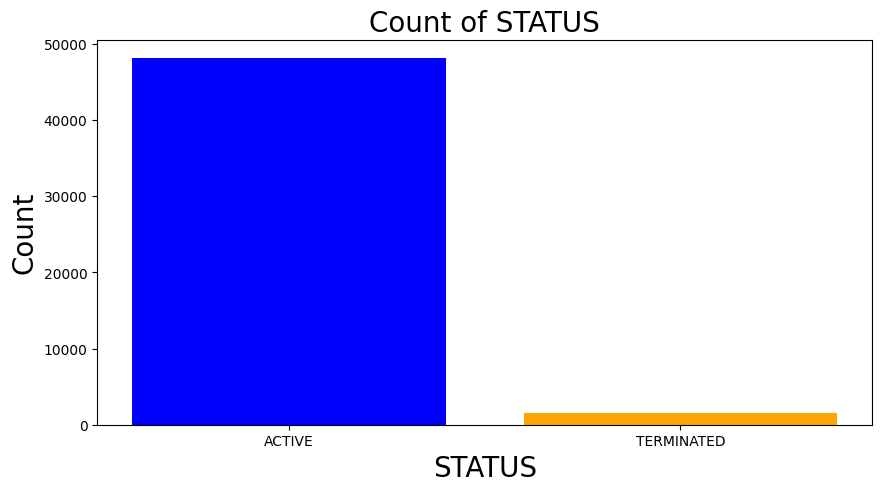

In [709]:
status_label = df.STATUS.value_counts()
plt.figure(figsize=(10, 5))
plt.bar(status_label.index, status_label, color=['blue', 'orange'])  # Colori definiti manualmente
plt.xlabel('STATUS', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Count of STATUS', fontsize=20)
plt.xticks(ticks=status_label.index, labels=['ACTIVE', 'TERMINATED'], fontsize=10)
plt.show()

## Bilanciamento Dei Dati
### le 2 classi sono altamente sbilanciate, le bilanciamo


In [710]:
from sklearn.utils import resample #Utilizzo Resampling per risolvere il problema della classe minoritaria

# Separo le target Class
df_1 = df[df.STATUS=="ACTIVE"]
df_2 = df[df.STATUS=="TERMINATED"]
 
# Upsample la classe minore
df_2_upsampled = resample(df_2, #creo copie di righe di df2 con lo stesso numero di righe di df1
                                 replace=True,     
                                 n_samples=48168,    #corrispondenza alla classe maggioritaria
                                 random_state=123)   #risultati riproducibili

# combino la classe maggioritaria con la classe minore
df_upsampled = pd.concat([df_1, df_2_upsampled])
 
# Visualizzo
df_upsampled.STATUS.value_counts()

STATUS
ACTIVE        48168
TERMINATED    48168
Name: count, dtype: int64

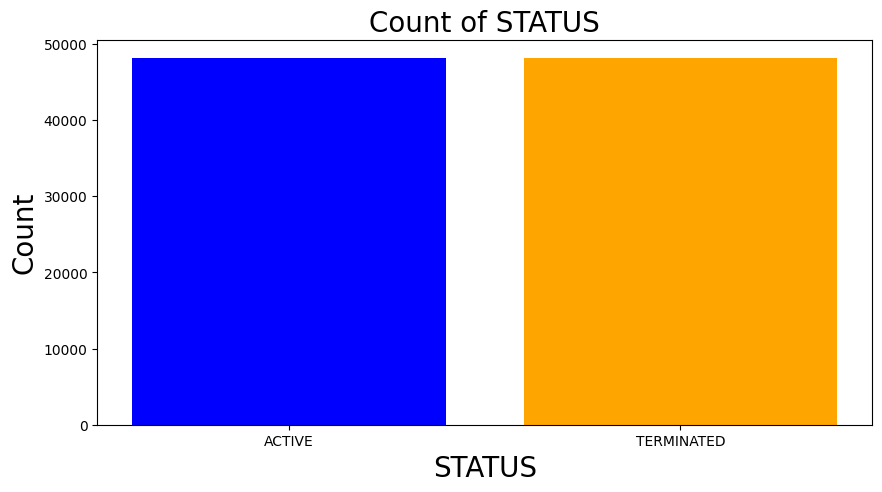

In [711]:
#Dopo aver campiato la classe minoritaria, la classe maggioritaria è più rappresentata
#Rivisualizziamo

status_label = df_upsampled.STATUS.value_counts()

# Creazione del grafico a barre con colori personalizzati
plt.figure(figsize=(10, 5))
plt.bar(status_label.index, status_label, color=['blue', 'orange'])  # Colori definiti manualmente
plt.xlabel('STATUS', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Count of STATUS', fontsize=20)
plt.xticks(ticks=status_label.index, labels=['ACTIVE', 'TERMINATED'], fontsize=10)
plt.show()



### Distribuzione di Status sulle Città (usando Seaborn)


<Axes: xlabel='city_name', ylabel='count'>

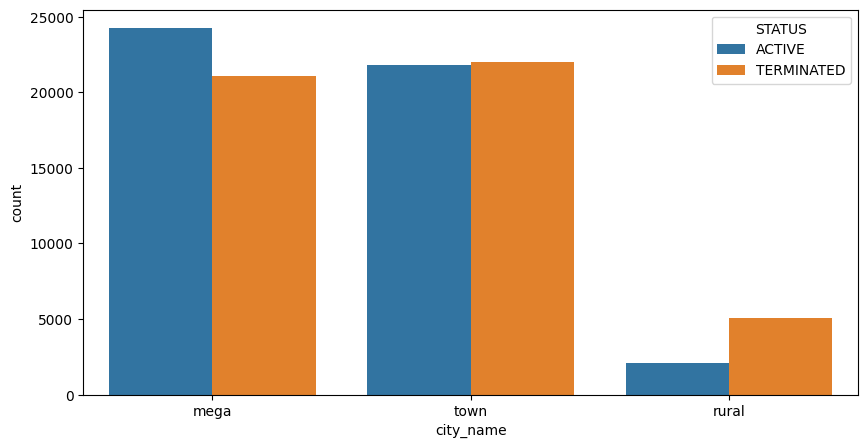

In [712]:
plt.figure(figsize=(10, 5))
sns.countplot(x="city_name", hue="STATUS", data=df_upsampled)

-> Il numero massimo di dipendenti proviene dalla megalopoli in cui il rapporto tra lo stato attivo e quello termianto del dipendente è più elevato (attivo > terminato)

-> Il numero di dipendenti della città è inferiore rispetto alle megalopoli ma molto più elevato rispetto all'area rurale e il rapporto tra lo stato attivo e quello terminato del dipendente è quasi lo stesso (attivo ~ terminato)

-> Il minor numero di dipendenti proviene da aree rurali e il rapporto tra stato attivo e terminato del dipendente è inferiore (attivo < terminato)

### Distribuzione dello Status in base alla Unità dell'Azienda

<Axes: xlabel='BUSINESS_UNIT', ylabel='count'>

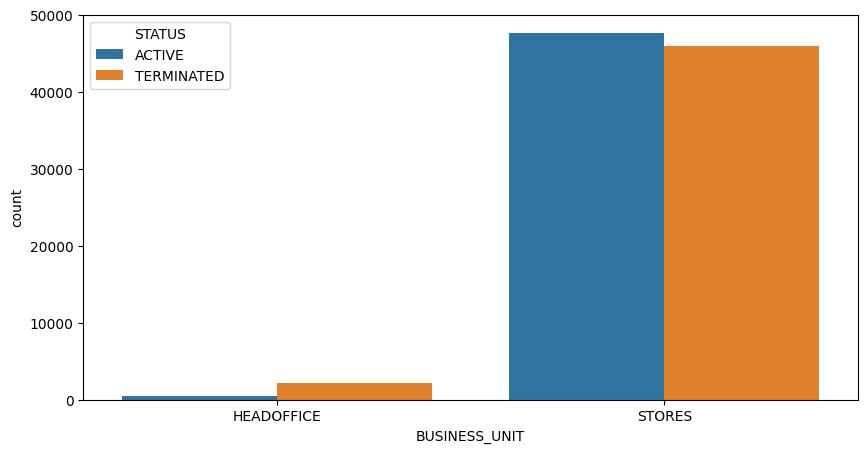

In [713]:
plt.figure(figsize=(10, 5))
sns.countplot(x="BUSINESS_UNIT", hue="STATUS", data=df_upsampled)

-> Un numero maggiore di dipendenti proviene dai negozi e non dalla sede centrale.

-> I casi di licenziamento sono più elevati nelle sedi centrali mentre i casi di licenziamento sono più bassi nei negozi.

### Distribuzione dello Status in base al Ruolo

<Axes: xlabel='job_title', ylabel='count'>

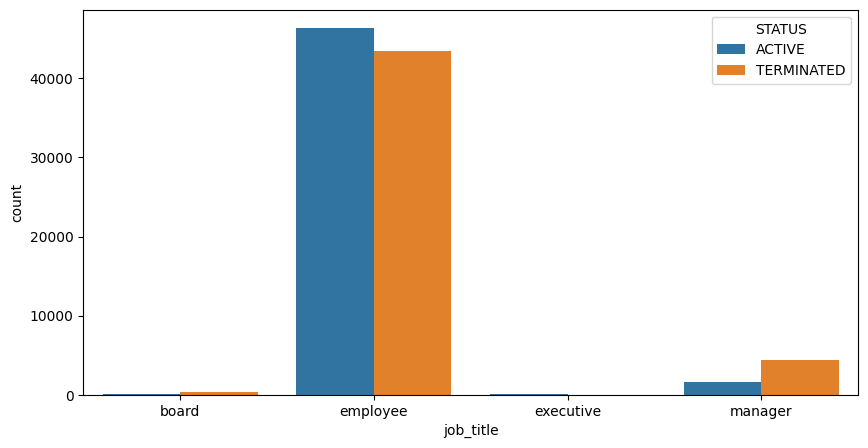

In [714]:
plt.figure(figsize=(10, 5))
sns.countplot(x="job_title", hue="STATUS", data=df_upsampled)

-> Il numero massimo di "Dipendenti" è quello con la qualifica da dipendente

-> Il numero di quelli con stato attivo è superiore al numero di quelli con stato terminato.

### Distribuzione dell'età rispetto allo Stato

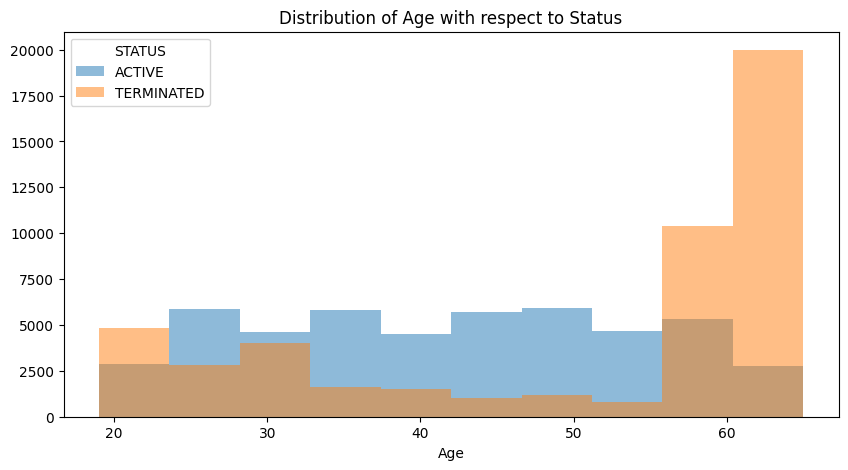

In [715]:
plt.figure(figsize=(10, 5))
plt.hist("age", data = df_upsampled[df_upsampled["STATUS"] == "ACTIVE"], alpha = 0.5, label = "ACTIVE")
plt.hist("age", data = df_upsampled[df_upsampled["STATUS"] == "TERMINATED"], alpha = 0.5, label = "TERMINATED")
plt.title("Distribution of Age with respect to Status")
plt.xlabel("Age")
plt.legend(title = "STATUS")
plt.show()

### Inizio della creazione del Modello 

In [716]:
df_upsampled.head()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,52,17,mega,Executive,board,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,53,18,mega,Executive,board,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,54,19,mega,Executive,board,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,55,20,mega,Executive,board,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,56,21,mega,Executive,board,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


### Trasformo tutte i valori in Valori Numerici


### Mappatura delle variabili categoriche 

-> City Name

In [717]:
city_name_label = {value: key for key, value in enumerate(df_upsampled['city_name'].unique())}
df_upsampled['city_name'] = df_upsampled['city_name'].map(city_name_label)

-> Department Name

In [718]:
department_name_label = {value: key for key, value in enumerate(df_upsampled['department_name'].unique())}
df_upsampled['department_name'] = df_upsampled['department_name'].map(department_name_label)

-> Job Title

In [719]:
job_title_label = {value: key for key, value in enumerate(df_upsampled['job_title'].unique())}
df_upsampled['job_title'] = df_upsampled['job_title'].map(job_title_label)

-> Gender 

In [720]:
gender_short_label = {value: key for key, value in enumerate(df_upsampled['gender_short'].unique())}
df_upsampled['gender_short'] = df_upsampled['gender_short'].map(gender_short_label)

-> Ragione del licenziamento


In [721]:
term_desc_label = {value: key for key, value in enumerate(df_upsampled['termreason_desc'].unique())}
df_upsampled['termreason_desc'] = df_upsampled['termreason_desc'].map(term_desc_label)

-> Tipologia di Licenziamento

In [722]:
termtype_desc_label = {value: key for key, value in enumerate(df_upsampled['termtype_desc'].unique())}
df_upsampled['termtype_desc'] = df_upsampled['termtype_desc'].map(termtype_desc_label)

-> Status

In [723]:
status_label = {value: key for key, value in enumerate(df_upsampled['STATUS'].unique())}
df_upsampled['STATUS'] = df_upsampled['STATUS'].map(status_label)

-> Business Unit

In [724]:
business_label = {value: key for key, value in enumerate(df_upsampled['BUSINESS_UNIT'].unique())}
df_upsampled['BUSINESS_UNIT'] = df_upsampled['BUSINESS_UNIT'].map(business_label)

### Visualizzo il dataset dopo aver cambiato i valori in Numerici

In [725]:
df_upsampled.head()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,52,17,0,0,0,35,0,0,0,2006,0,0
1,53,18,0,0,0,35,0,0,0,2007,0,0
2,54,19,0,0,0,35,0,0,0,2008,0,0
3,55,20,0,0,0,35,0,0,0,2009,0,0
4,56,21,0,0,0,35,0,0,0,2010,0,0


In [726]:
df_upsampled.tail()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
48938,60,8,1,10,1,18,0,3,1,2007,1,1
48796,65,13,1,2,1,28,1,3,1,2010,1,1
49456,26,3,1,19,1,21,1,1,1,2012,1,1
49046,60,8,0,2,1,35,0,3,1,2007,1,1
48644,65,13,0,2,1,25,1,3,1,2008,1,1


### Visualizzazione della Correlazione tra le colonne

Text(0.5, 1.0, 'Correlation Matrix')

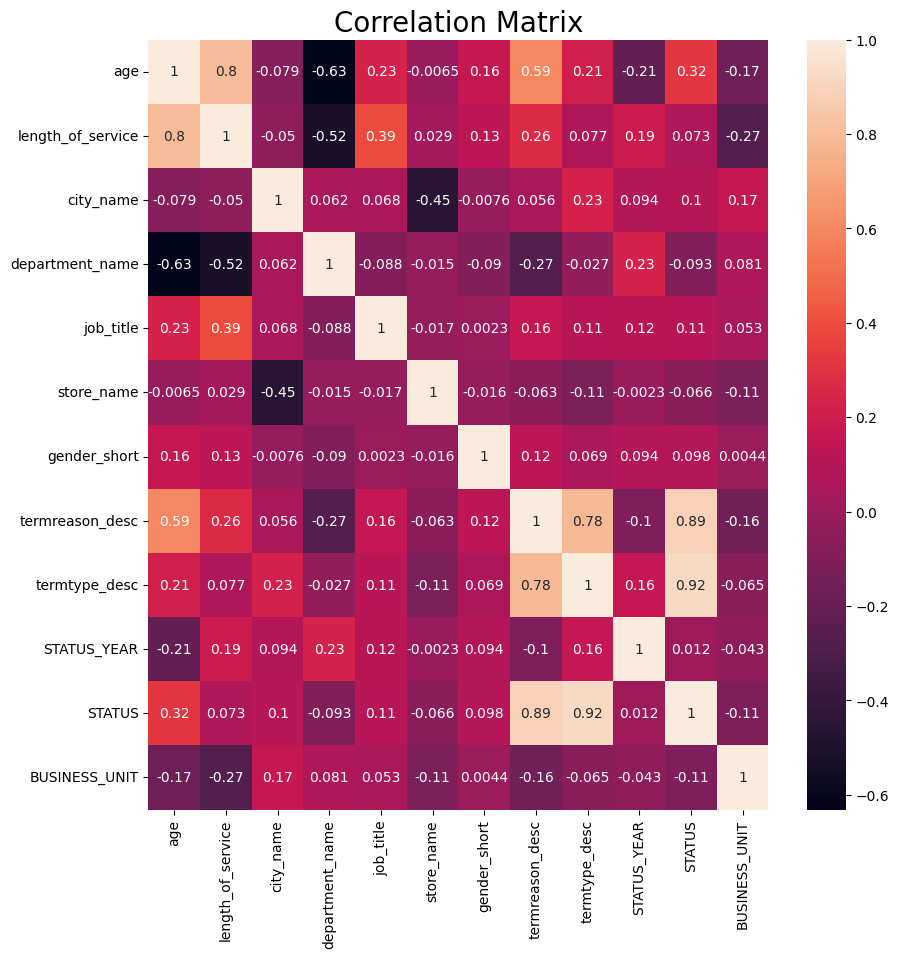

In [727]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_upsampled.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=20)

Verifica della correlazione dello STATUS in base alle altre Features

In [728]:
df_upsampled.corr()['STATUS'].sort_values(ascending=False)[1:]

termtype_desc        0.917547
termreason_desc      0.886604
age                  0.315872
job_title            0.109929
city_name            0.102445
gender_short         0.098114
length_of_service    0.072507
STATUS_YEAR          0.012100
store_name          -0.066467
department_name     -0.093282
BUSINESS_UNIT       -0.105738
Name: STATUS, dtype: float64

### Leggo che la Tipologia di Licenziamento ha una forte correlazione con STATUS

In [729]:
df_upsampled.drop(['termreason_desc', 'termtype_desc',], axis=1, inplace=True)

Elimino le 2 variabili con correlazione molto alta per evitare rindondanza e Overfitting di dati

In [730]:
df_upsampled.head()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,52,17,0,0,0,35,0,2006,0,0
1,53,18,0,0,0,35,0,2007,0,0
2,54,19,0,0,0,35,0,2008,0,0
3,55,20,0,0,0,35,0,2009,0,0
4,56,21,0,0,0,35,0,2010,0,0


### Inizio ad allenare e creare il mio modello di Logistic Regression (Binary Classification)

In [731]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

In [732]:
X = df_upsampled[['age', 'length_of_service', 'city_name', 'department_name', 'job_title', 'store_name', 'gender_short',
       'STATUS_YEAR', 'BUSINESS_UNIT']]
y = df_upsampled['STATUS'].values #Converto la colonna in array unidimensionale

In [733]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #splitto il dataset

In [734]:
X.shape #Dati totali

(96336, 9)

In [735]:
X_train.shape #Dati che utilizzeremo x il modello

(77068, 9)

In [736]:
scaler = StandardScaler() #Utilizzo StandardScaler per la Standardizzazione

In [737]:
scaler.fit(X_train) 


StandardScaler()

In [738]:
x_train_scaled = scaler.fit_transform(X_train) 
x_test_scaled = scaler.fit_transform(X_test)

In [739]:
model = LogisticRegression(max_iter=5000) #5000 iterazioni per evitare che ci sia il warning sulle troppe iterazioni
model.fit(X_train, y_train) #Addestramento

LogisticRegression(max_iter=5000)

In [740]:
y_pred = model.predict(X_test) #Predizione

## Visualizzazione finale dei risultati del modello

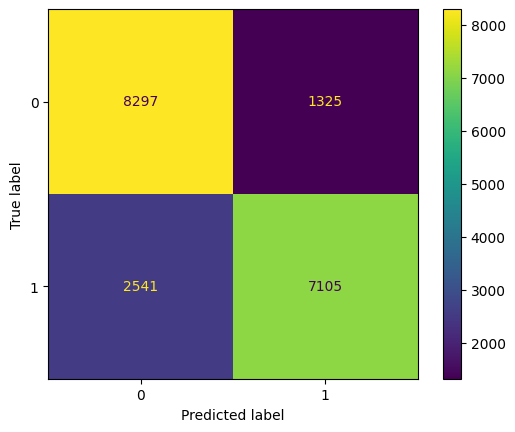

In [741]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [742]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.80


In [743]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      9622
           1       0.84      0.74      0.79      9646

    accuracy                           0.80     19268
   macro avg       0.80      0.80      0.80     19268
weighted avg       0.80      0.80      0.80     19268

